In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [11]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
data.shape

(918, 12)

Age                Axes(0.125,0.53;0.168478x0.35)
RestingBP       Axes(0.327174,0.53;0.168478x0.35)
Cholesterol     Axes(0.529348,0.53;0.168478x0.35)
FastingBS       Axes(0.731522,0.53;0.168478x0.35)
MaxHR              Axes(0.125,0.11;0.168478x0.35)
Oldpeak         Axes(0.327174,0.11;0.168478x0.35)
HeartDisease    Axes(0.529348,0.11;0.168478x0.35)
dtype: object

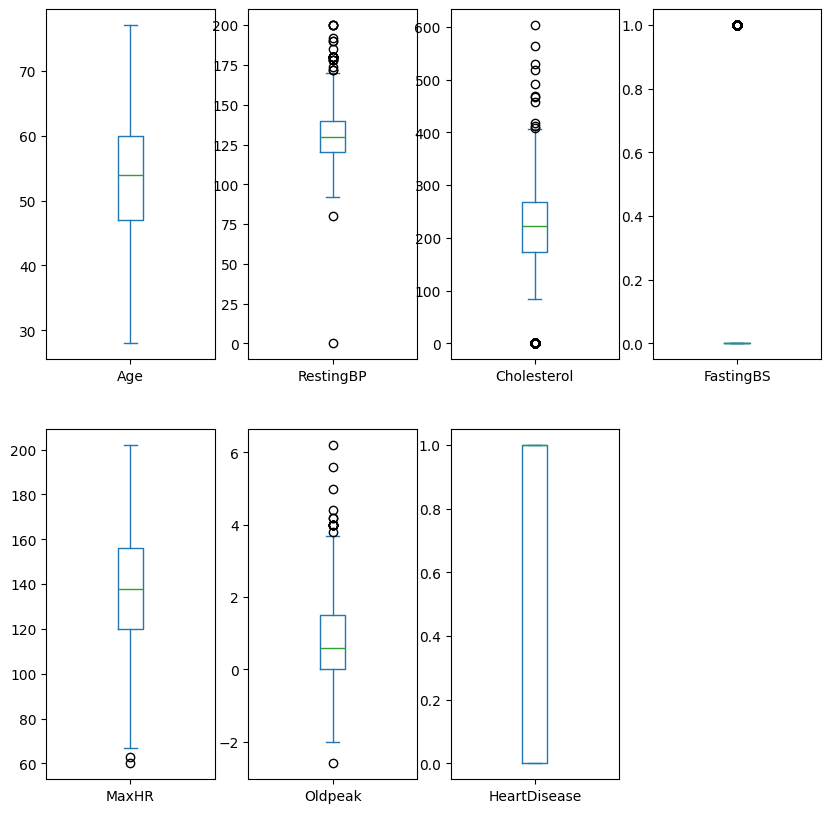

In [18]:
#EDA

data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(10,10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

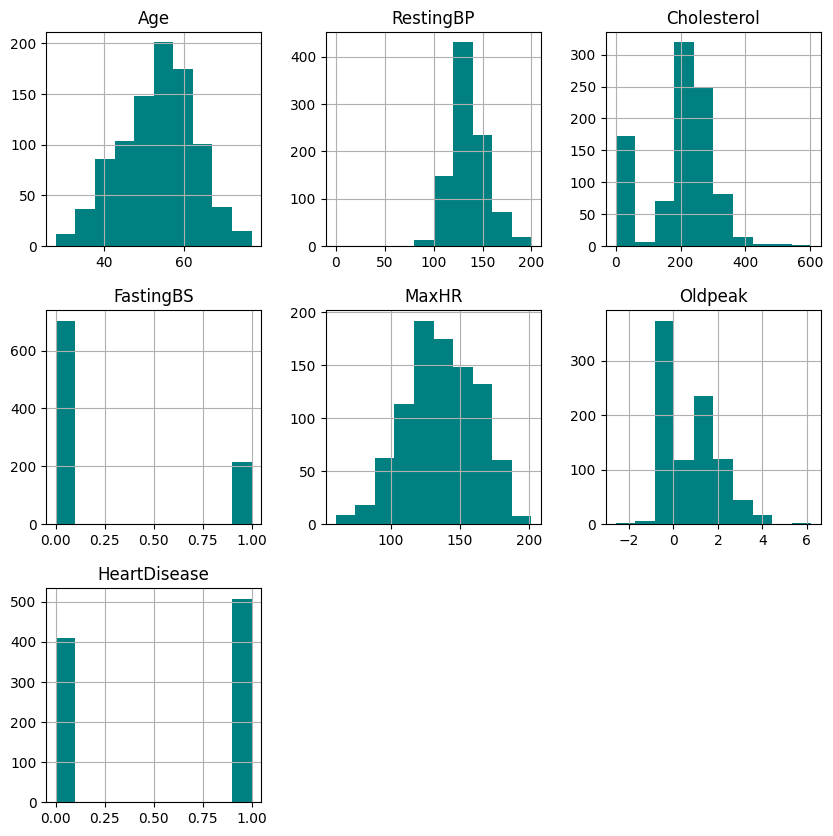

In [19]:
data.hist(figsize=(10,10), color = "teal")

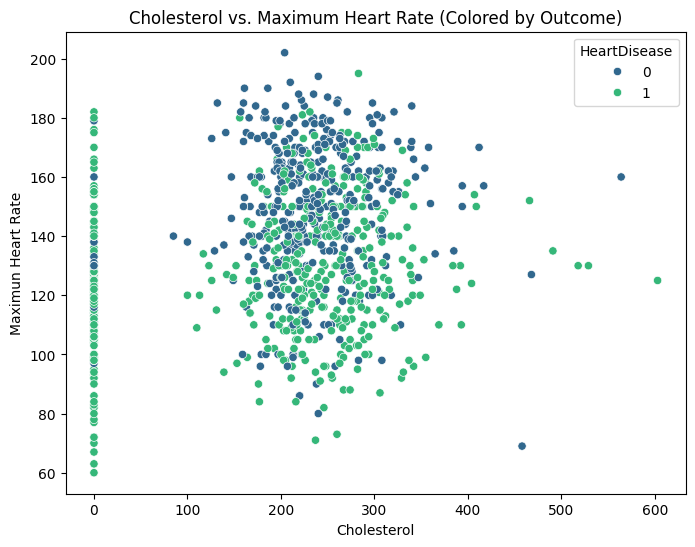

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cholesterol', y='MaxHR', hue='HeartDisease', data=data, palette='viridis')
plt.title('Cholesterol vs. Maximum Heart Rate (Colored by Outcome)')
plt.xlabel('Cholesterol')
plt.ylabel('Maximun Heart Rate')
plt.show()

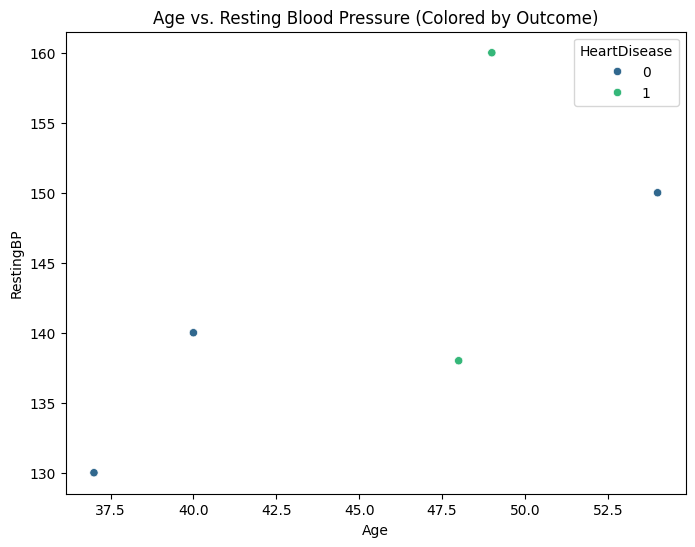

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='RestingBP', hue='HeartDisease', data=data, palette='viridis')
plt.title('Age vs. Resting Blood Pressure (Colored by Outcome)')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


df = pd.DataFrame(data)

# Columns to encode
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' option to avoid collinearity

# Apply encoding to categorical columns (use the DataFrame df)
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert encoded data into a DataFrame with the correct column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame (excluding the encoded columns) with the encoded columns
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)


In [51]:
#Printing the encoded data
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0
2,37,130,283,0,98,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0
3,48,138,214,0,108,1.5,1,0.0,0.0,0.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,1.0,0.0,1.0,0.0,0.0,1.0


In [52]:
#splitting the data
X = df_encoded.drop(["HeartDisease"],axis=1)

y = df_encoded["HeartDisease"]

In [53]:

X = preprocessing.StandardScaler().fit(X).transform(X)

In [54]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

model = LogisticRegression()

In [55]:
model.fit(X_train,y_train)

LogisticRegression()

In [56]:
# model evaluation
# accuracy on train dataset
predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, predictions)
train_accuracy

1.0

In [57]:
#accuracy on test dataset
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

1.0

In [58]:
print(f"Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



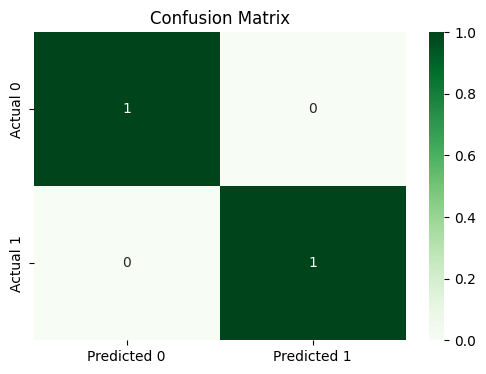

In [60]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix')
plt.show()